# hw2: Решающие деревья

*Спасибо великому курсу великого Евгения Соколова*

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплементацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

Все данные, на которых будут обучаться модели, вы можете найти на диске.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Неэффективная и/или неоригинальная реализация кода может негативно отразиться на оценке.

### Формат сдачи
Заполненный ноутбук ```hw2-trees.ipynb``` и модуль с реализованными функциями и классами ```hw2code.py``` необходимо загрузить на свой Github. Затем нужно оставить комментарий в Google-таблице с оценками в столбце <<hw2>> в строке со своей фамилией о том, что вы выполнили работу с указанием ника на Kaggle.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

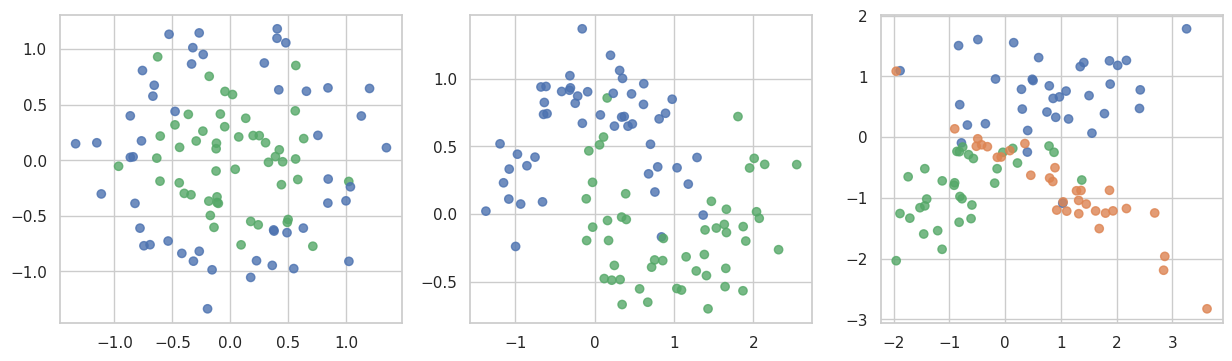

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

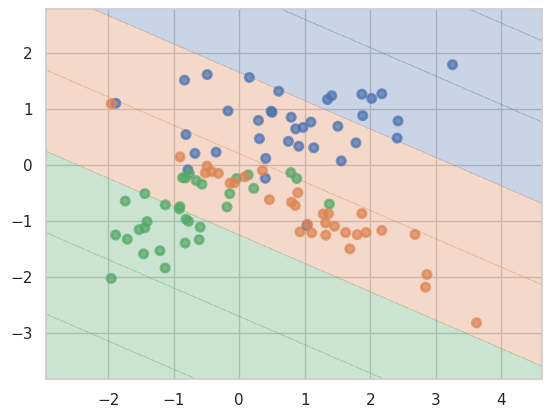

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Circle          | Learn: 1.000 | Test: 0.640 | Diff: 0.360
Moons           | Learn: 1.000 | Test: 0.920 | Diff: 0.080
Classification  | Learn: 1.000 | Test: 0.800 | Diff: 0.200


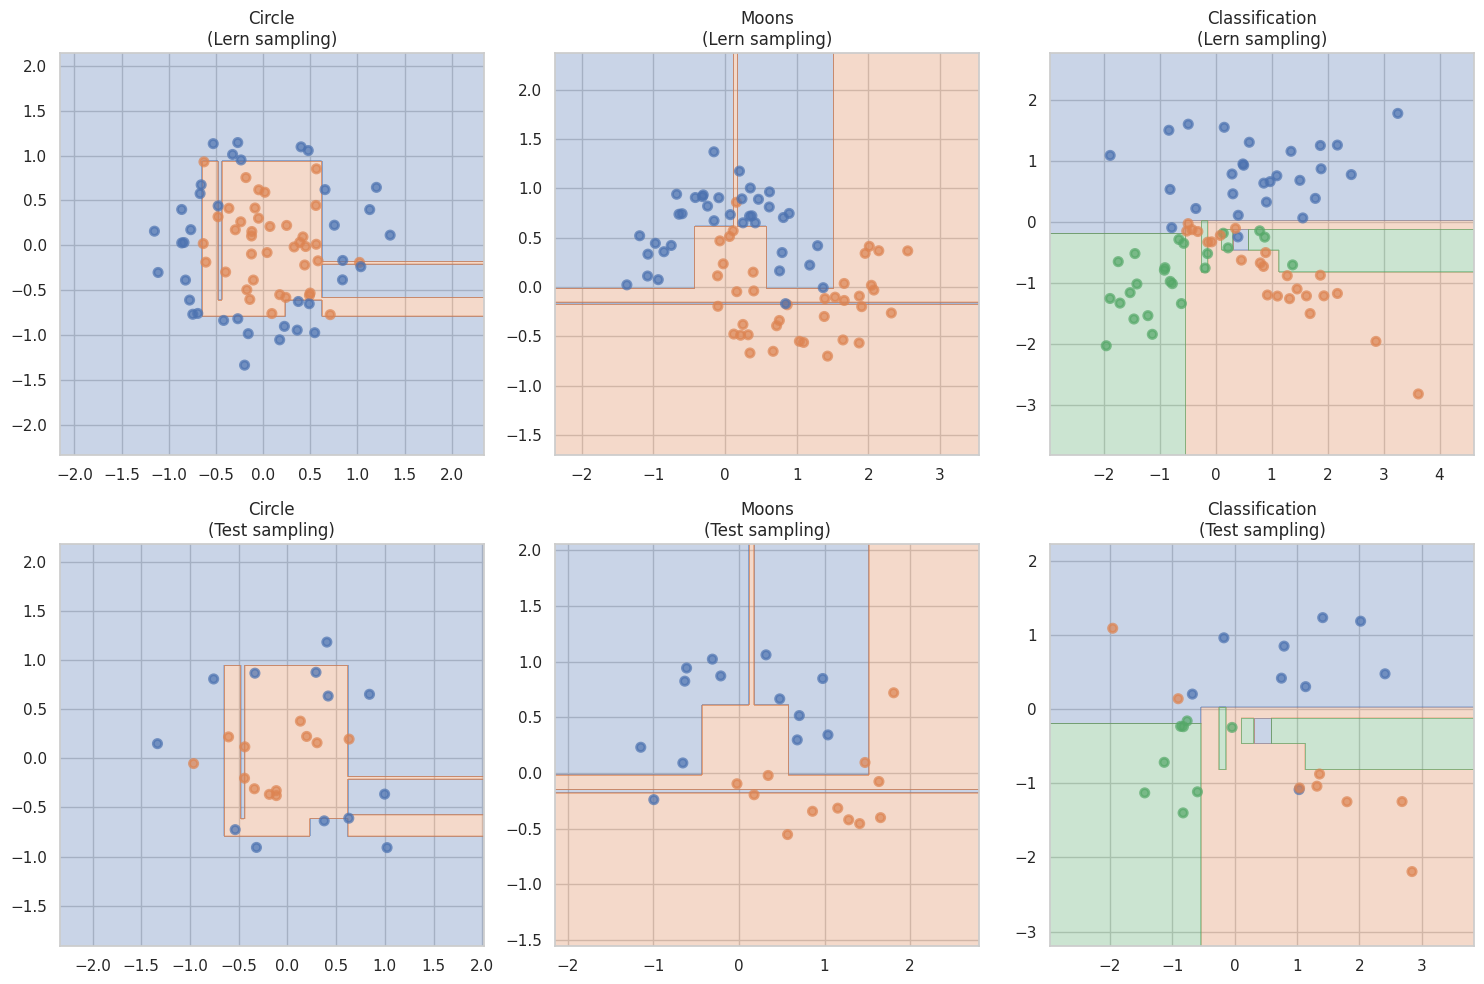

In [7]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.metrics import mean_squared_error, accuracy_score

datasets = [
    ("Circle", make_circles(noise=0.2, factor=0.5, random_state=42)),
    ("Moons", make_moons(noise=0.2, random_state=42)),
    ("Classification", make_classification(
        n_classes=3,
        n_clusters_per_class=1,
        n_features=2,
        class_sep=0.8,
        random_state=3,
        n_redundant=0
    ))
]

dtc = DecisionTreeClassifier(random_state=42)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, (name, (X, y)) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=43)
    dtc.fit(X_train, y_train)

    pred_train = dtc.predict(X_train)
    pred_test = dtc.predict(X_test)

    acc_train, acc_test = accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)
    print(f'{name:15} | Learn: {acc_train:.3f} | '
          f'Test: {acc_test:.3f} | '
          f'Diff: {abs(acc_train - acc_test):.3f}')

    for row, (X, y) in enumerate([(X_train, y_train), (X_test, y_test)]):
        current_ax = axes[row, i]
        plt.sca(current_ax)
        plot_surface(dtc, X, y)
        current_ax.set_title(f"{name}\n({'Lern' if row == 0 else 'Test'} sampling)")

plt.tight_layout()
plt.show()

__Ответ:__ Модель переобучена: при 100% точности на трейне, тестовая точность отстает. Она демонстрирует тенденцию к росту (стремится к 1), но остается ниже обучающей, причем величина этого разрыва варьируется в зависимости от размера выборки.

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?


ДАТАСЕТ: CIRCLE

--- min_samples_leaf = 1 ---
max_depth= 1 | Train: 0.660 | Test: 0.600 | DELTA: +0.060
max_depth= 3 | Train: 0.900 | Test: 0.720 | DELTA: +0.180
max_depth= 7 | Train: 1.000 | Test: 0.800 | DELTA: +0.200
max_depth=11 | Train: 1.000 | Test: 0.800 | DELTA: +0.200


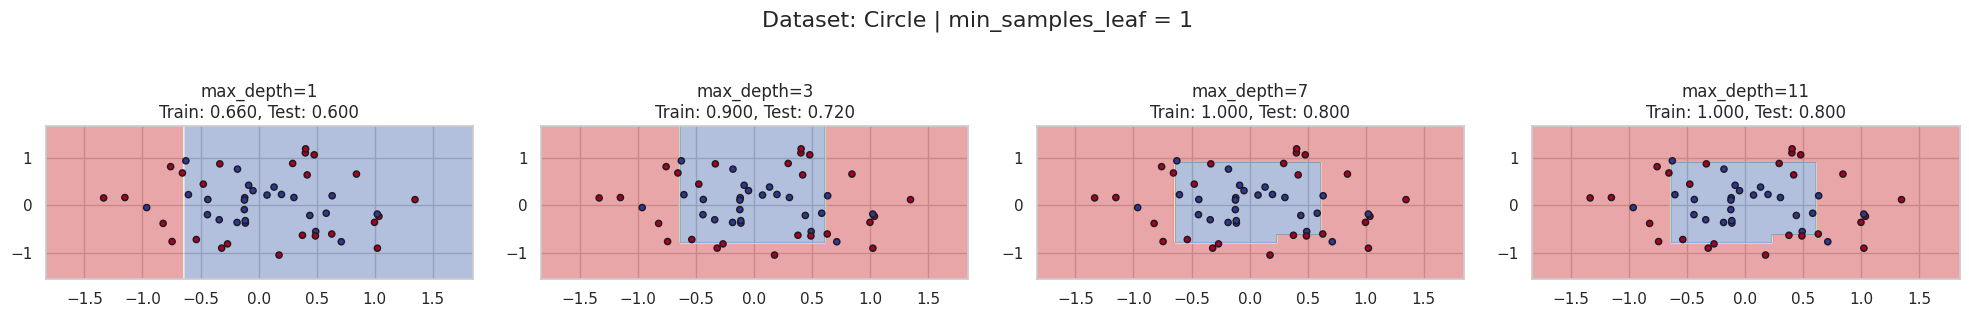


--- min_samples_leaf = 3 ---
max_depth= 1 | Train: 0.660 | Test: 0.600 | DELTA: +0.060
max_depth= 3 | Train: 0.900 | Test: 0.720 | DELTA: +0.180
max_depth= 7 | Train: 0.980 | Test: 0.760 | DELTA: +0.220
max_depth=11 | Train: 0.980 | Test: 0.760 | DELTA: +0.220


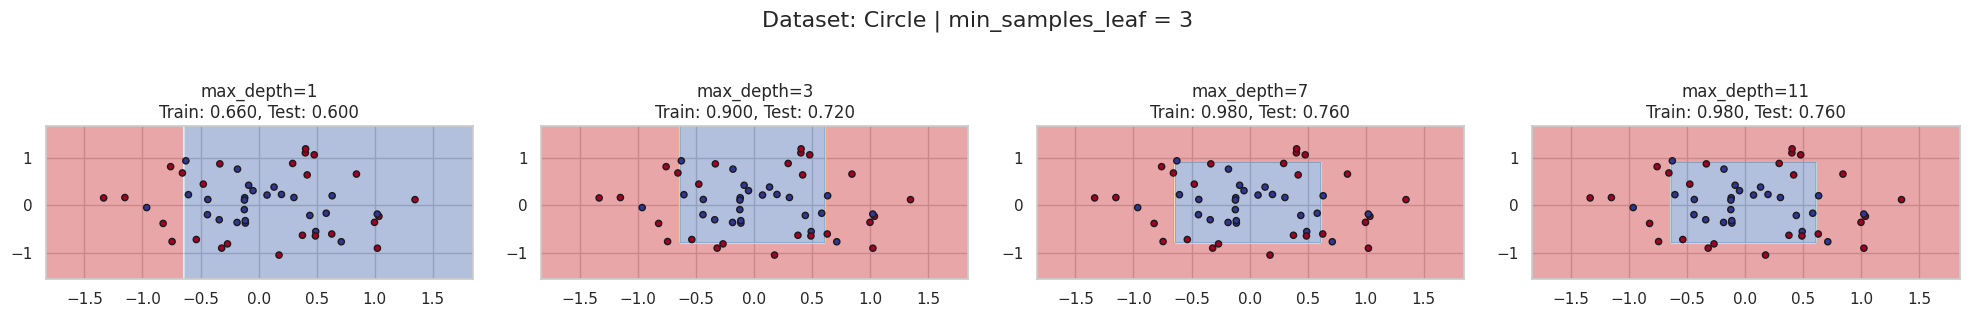


--- min_samples_leaf = 7 ---
max_depth= 1 | Train: 0.660 | Test: 0.600 | DELTA: +0.060
max_depth= 3 | Train: 0.880 | Test: 0.820 | DELTA: +0.060
max_depth= 7 | Train: 0.900 | Test: 0.820 | DELTA: +0.080
max_depth=11 | Train: 0.900 | Test: 0.820 | DELTA: +0.080


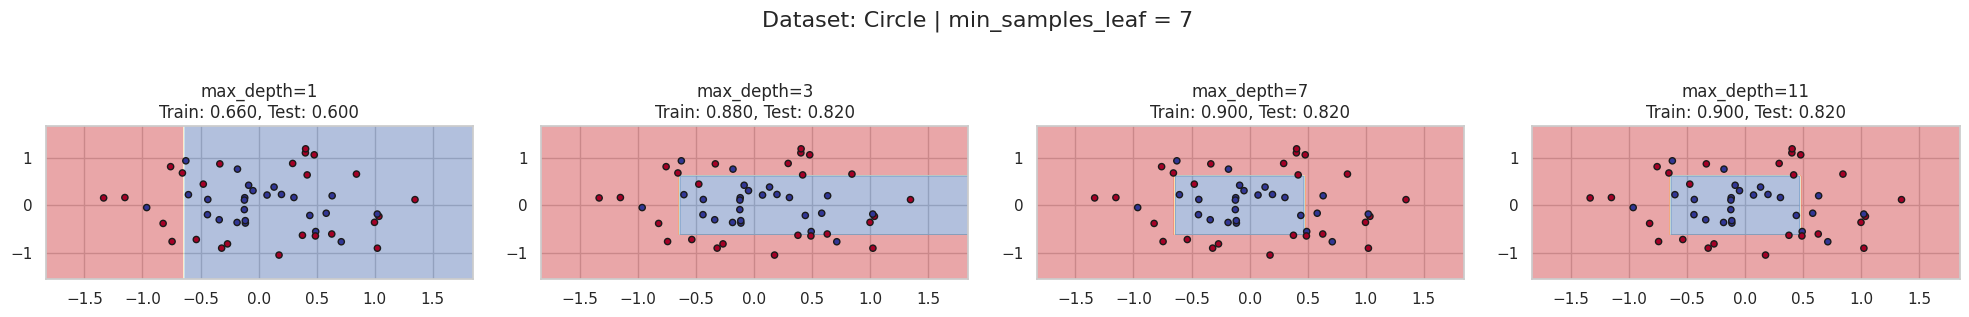


--- min_samples_leaf = 11 ---
max_depth= 1 | Train: 0.640 | Test: 0.580 | DELTA: +0.060
max_depth= 3 | Train: 0.720 | Test: 0.780 | DELTA: -0.060
max_depth= 7 | Train: 0.720 | Test: 0.780 | DELTA: -0.060
max_depth=11 | Train: 0.720 | Test: 0.780 | DELTA: -0.060


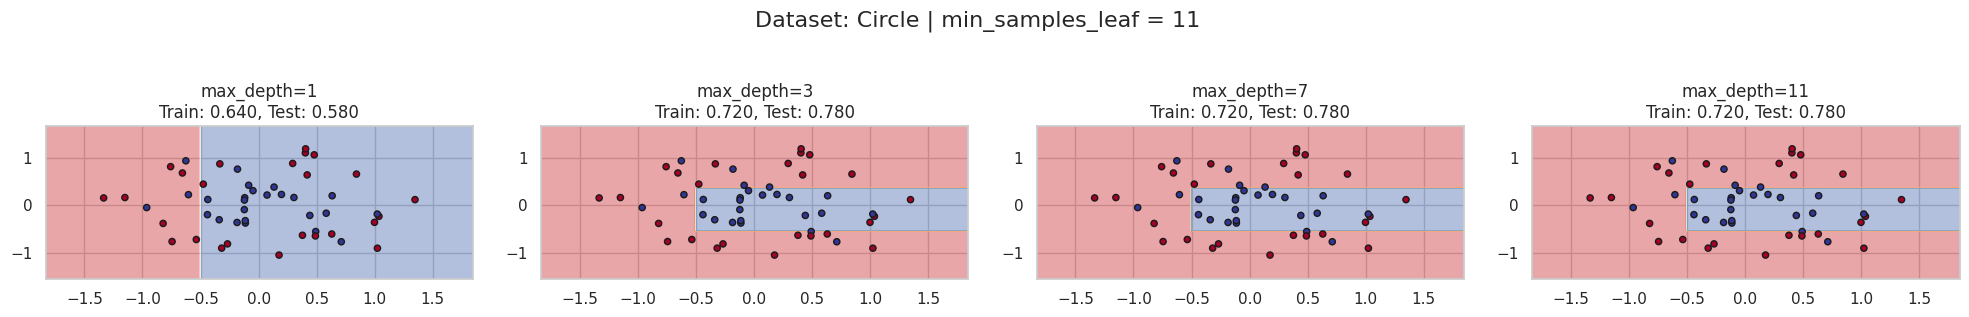


ДАТАСЕТ: MOONS

--- min_samples_leaf = 1 ---
max_depth= 1 | Train: 0.840 | Test: 0.820 | DELTA: +0.020
max_depth= 3 | Train: 0.980 | Test: 0.780 | DELTA: +0.200
max_depth= 7 | Train: 1.000 | Test: 0.860 | DELTA: +0.140
max_depth=11 | Train: 1.000 | Test: 0.860 | DELTA: +0.140


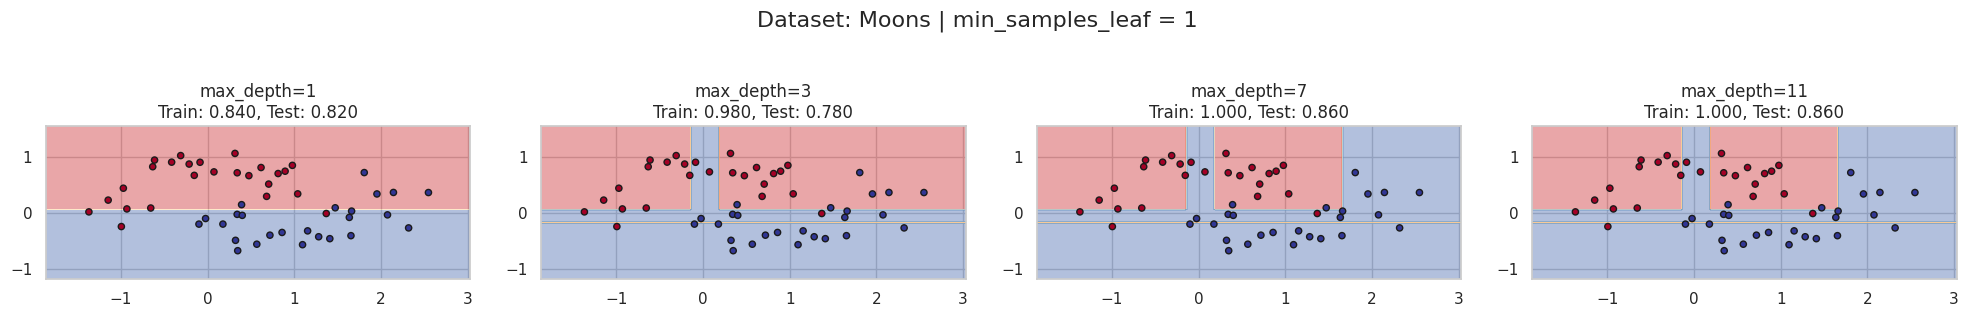


--- min_samples_leaf = 3 ---
max_depth= 1 | Train: 0.840 | Test: 0.820 | DELTA: +0.020
max_depth= 3 | Train: 0.960 | Test: 0.780 | DELTA: +0.180
max_depth= 7 | Train: 0.960 | Test: 0.780 | DELTA: +0.180
max_depth=11 | Train: 0.960 | Test: 0.780 | DELTA: +0.180


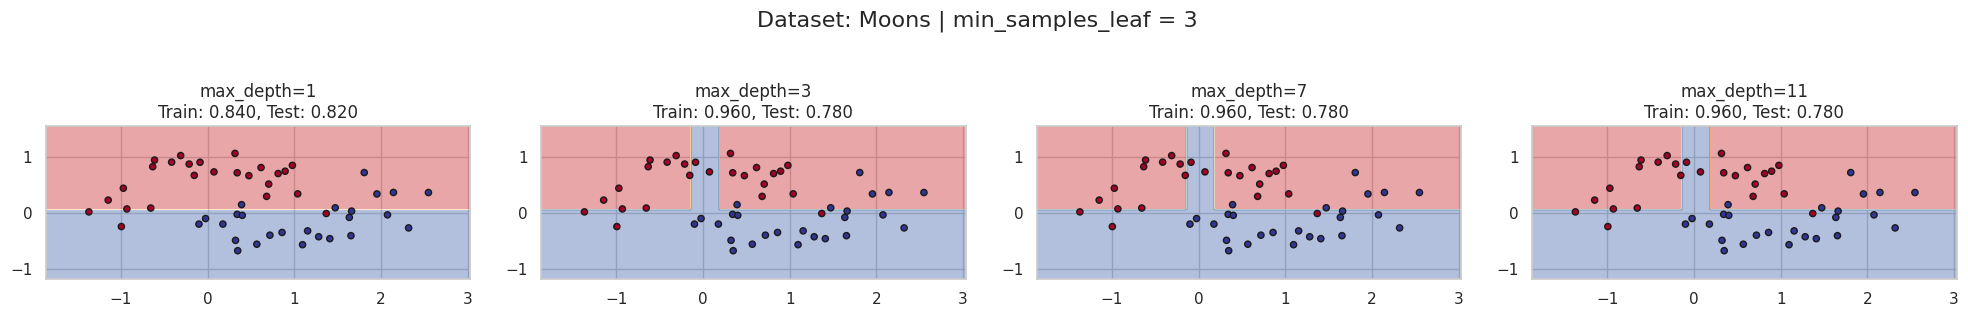


--- min_samples_leaf = 7 ---
max_depth= 1 | Train: 0.840 | Test: 0.820 | DELTA: +0.020
max_depth= 3 | Train: 0.940 | Test: 0.780 | DELTA: +0.160
max_depth= 7 | Train: 0.940 | Test: 0.780 | DELTA: +0.160
max_depth=11 | Train: 0.940 | Test: 0.780 | DELTA: +0.160


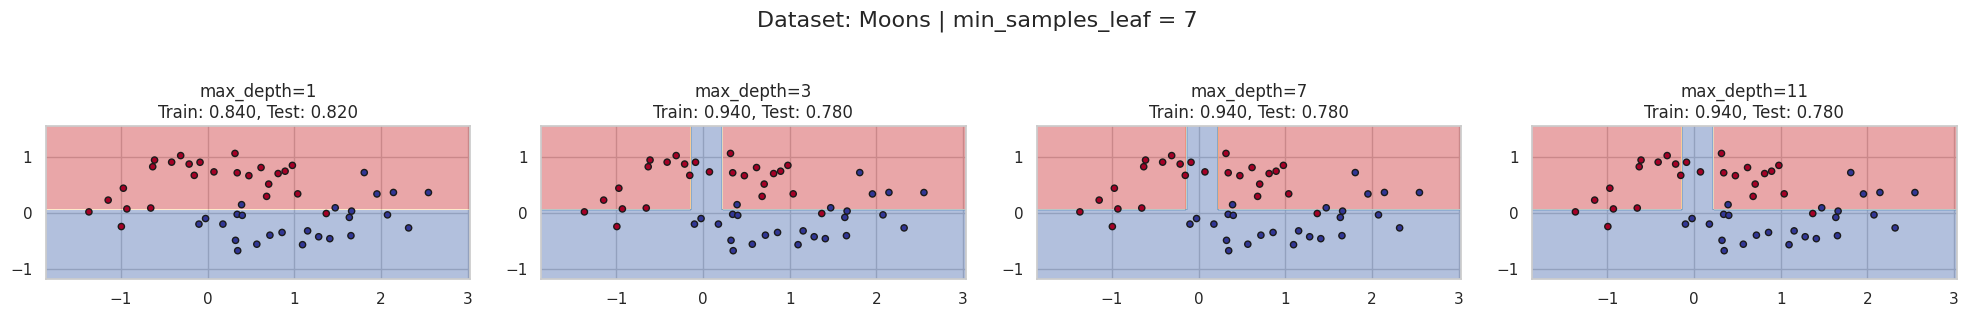


--- min_samples_leaf = 11 ---
max_depth= 1 | Train: 0.840 | Test: 0.820 | DELTA: +0.020
max_depth= 3 | Train: 0.840 | Test: 0.820 | DELTA: +0.020
max_depth= 7 | Train: 0.840 | Test: 0.820 | DELTA: +0.020
max_depth=11 | Train: 0.840 | Test: 0.820 | DELTA: +0.020


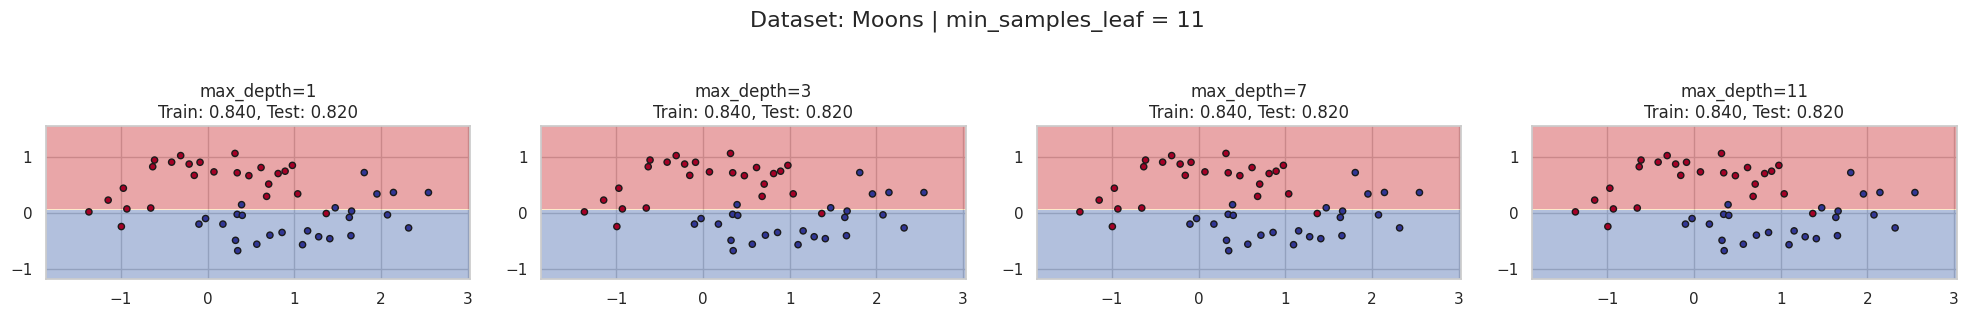


ДАТАСЕТ: CLASSIFICATION

--- min_samples_leaf = 1 ---
max_depth= 1 | Train: 0.680 | Test: 0.580 | DELTA: +0.100
max_depth= 3 | Train: 0.920 | Test: 0.820 | DELTA: +0.100
max_depth= 7 | Train: 1.000 | Test: 0.800 | DELTA: +0.200
max_depth=11 | Train: 1.000 | Test: 0.800 | DELTA: +0.200


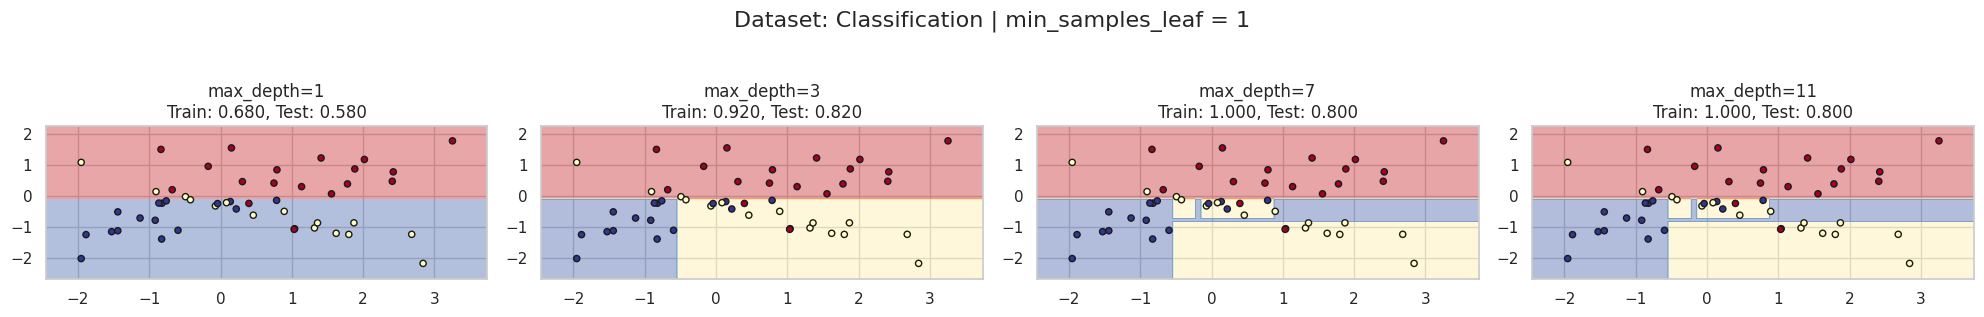


--- min_samples_leaf = 3 ---
max_depth= 1 | Train: 0.680 | Test: 0.580 | DELTA: +0.100
max_depth= 3 | Train: 0.920 | Test: 0.820 | DELTA: +0.100
max_depth= 7 | Train: 0.940 | Test: 0.820 | DELTA: +0.120
max_depth=11 | Train: 0.940 | Test: 0.820 | DELTA: +0.120


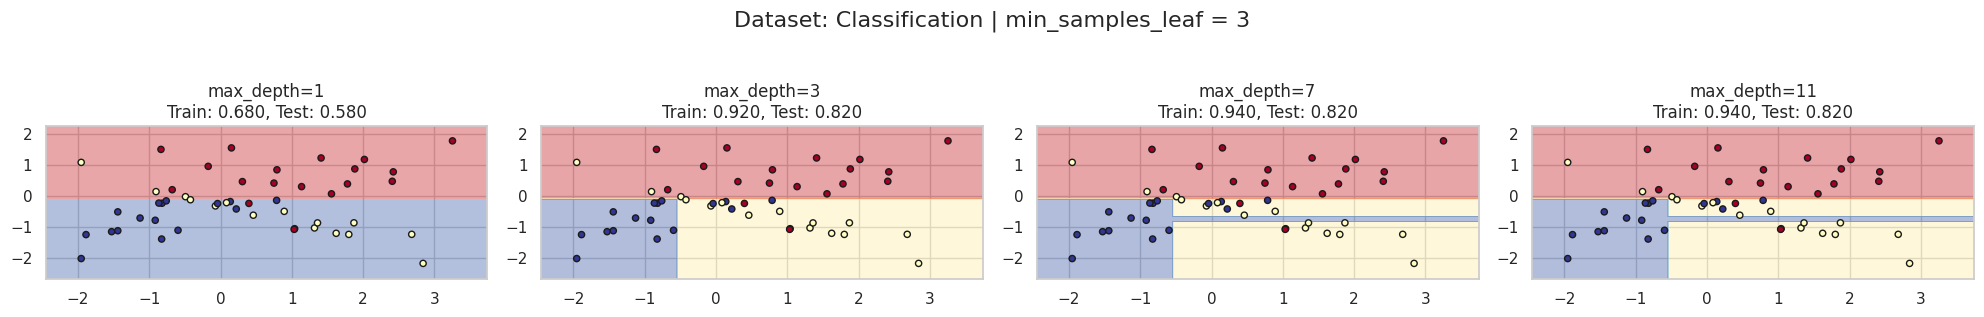


--- min_samples_leaf = 7 ---
max_depth= 1 | Train: 0.680 | Test: 0.580 | DELTA: +0.100
max_depth= 3 | Train: 0.920 | Test: 0.820 | DELTA: +0.100
max_depth= 7 | Train: 0.920 | Test: 0.820 | DELTA: +0.100
max_depth=11 | Train: 0.920 | Test: 0.820 | DELTA: +0.100


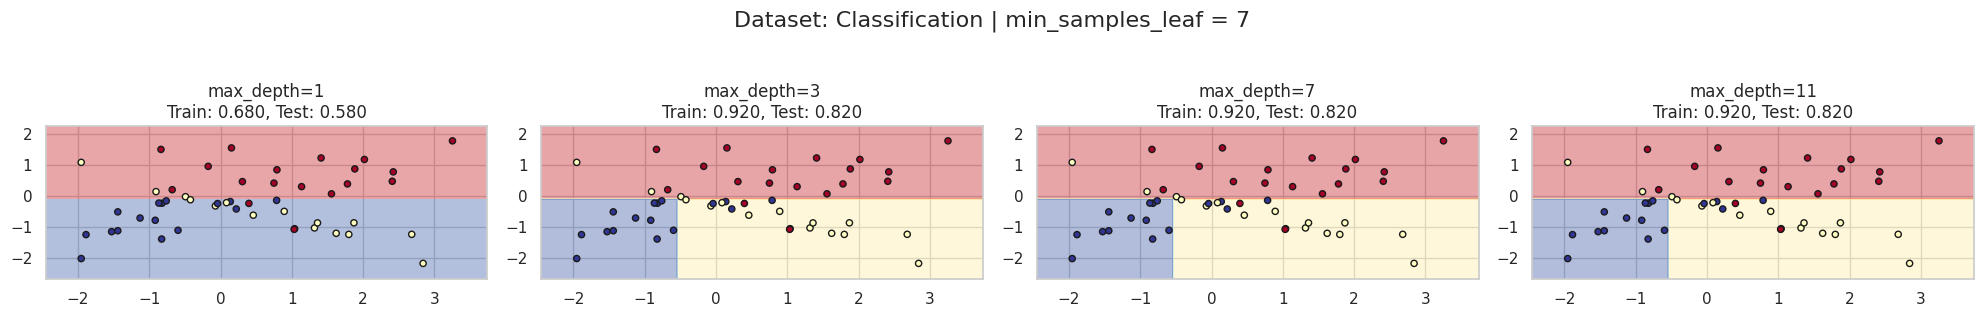


--- min_samples_leaf = 11 ---
max_depth= 1 | Train: 0.680 | Test: 0.580 | DELTA: +0.100
max_depth= 3 | Train: 0.920 | Test: 0.820 | DELTA: +0.100
max_depth= 7 | Train: 0.920 | Test: 0.820 | DELTA: +0.100
max_depth=11 | Train: 0.920 | Test: 0.820 | DELTA: +0.100


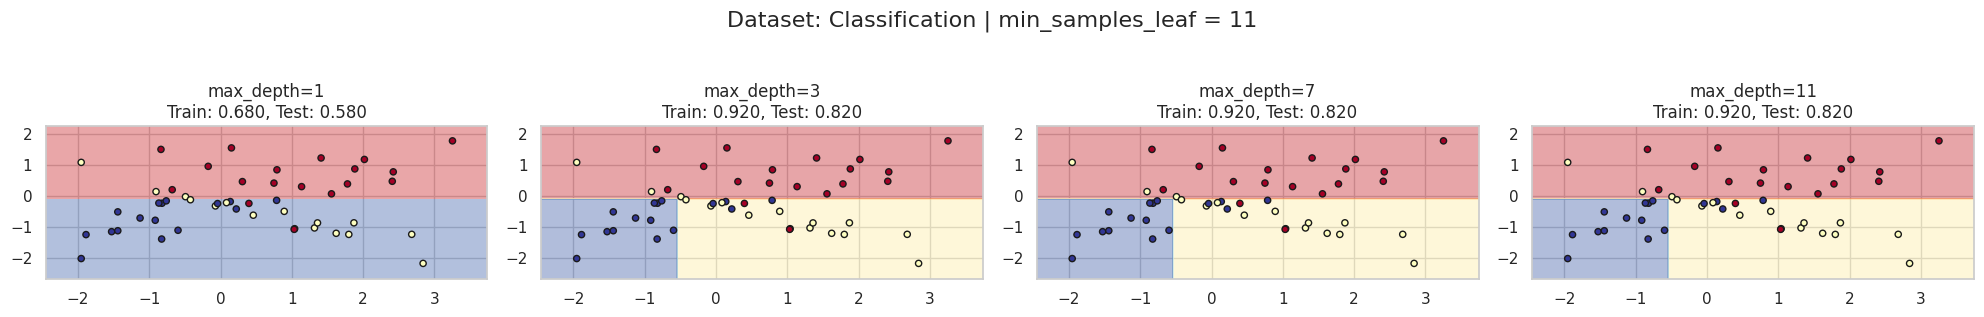

In [8]:
# ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
params = {
    "max_depth": [1, 3, 7, 11],
    "min_samples_leaf": [1, 3, 7, 11]
}

datasets = [
    ("Circle", make_circles(noise=0.2, factor=0.5, random_state=42)),
    ("Moons", make_moons(noise=0.2, random_state=42)),
    ("Classification", make_classification(
        n_classes=3,
        n_clusters_per_class=1,
        n_features=2,
        class_sep=0.8,
        random_state=3,
        n_redundant=0
    ))
]

def plot_surface(clf, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                        np.arange(y_min, y_max, 0.02))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=plt.cm.RdYlBu)

for i, (name, (X, y)) in enumerate(datasets):
    print(f"\n{'='*60}")
    print(f"ДАТАСЕТ: {name.upper()}")
    print(f"{'='*60}")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.5, stratify=y, random_state=43
    )

    results = []

    for leaf_idx, min_samples_leaf in enumerate(params['min_samples_leaf']):
        print(f"\n--- min_samples_leaf = {min_samples_leaf} ---")

        plt.figure(figsize=(20, 3))
        plt.suptitle(f"Dataset: {name} | min_samples_leaf = {min_samples_leaf}",
                     fontsize=16, y=1.05)

        for j, max_depth in enumerate(params['max_depth']):
            model = DecisionTreeClassifier(
                max_depth=max_depth,
                min_samples_leaf=min_samples_leaf,
                random_state=42
            )
            model.fit(X_train, y_train)

            acc_train = accuracy_score(y_train, model.predict(X_train))
            acc_test = accuracy_score(y_test, model.predict(X_test))
            delta = acc_train - acc_test

            results.append({
                'max_depth': max_depth,
                'min_samples_leaf': min_samples_leaf,
                'train_acc': acc_train,
                'test_acc': acc_test,
                'delta': delta
            })

            print(f"max_depth={max_depth:2d} | "
                  f"Train: {acc_train:.3f} | Test: {acc_test:.3f} | "
                  f"DELTA: {delta:+.3f}")

            plt.subplot(1, len(params['max_depth']), j + 1)
            plot_surface(model, X_test, y_test)
            plt.title(f"max_depth={max_depth}\nTrain: {acc_train:.3f}, Test: {acc_test:.3f}")

        plt.tight_layout()
        plt.show()

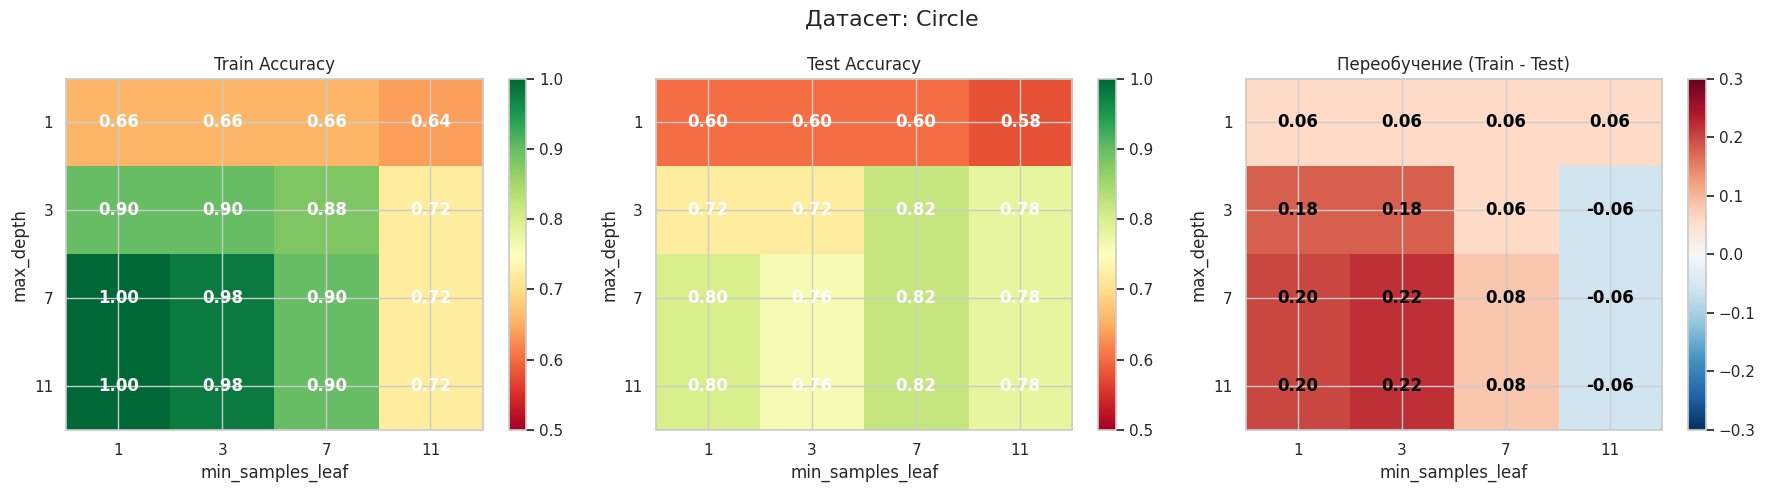

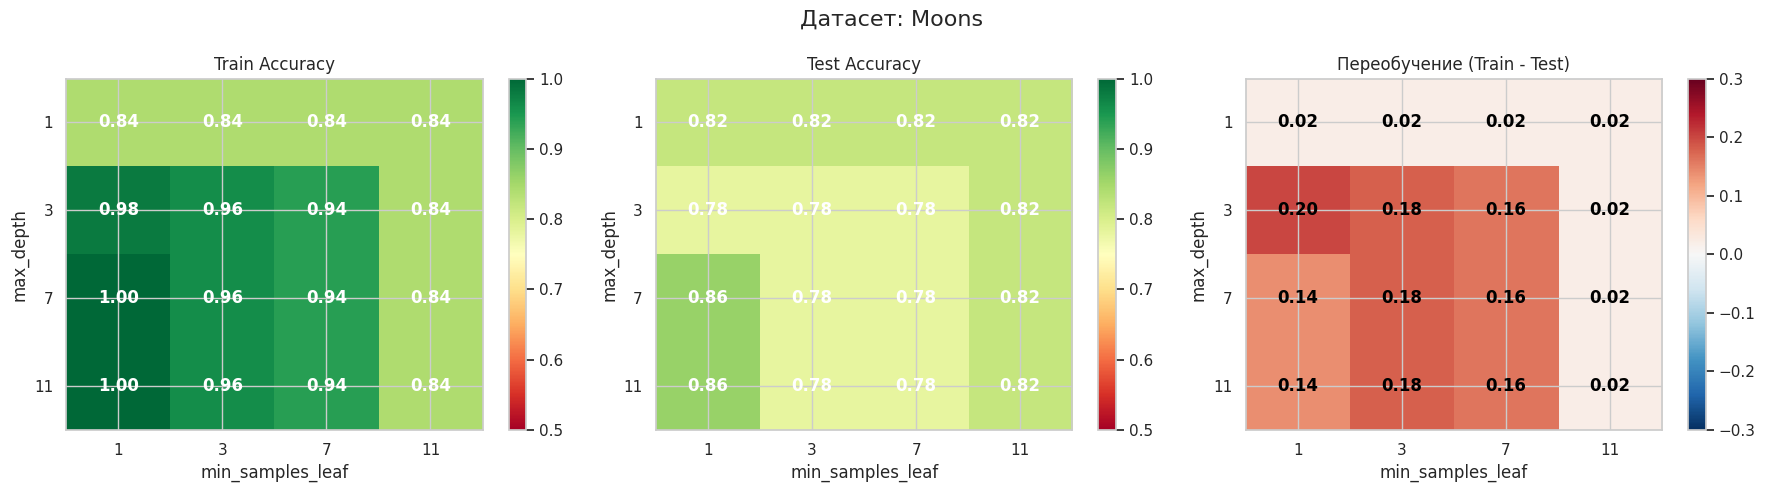

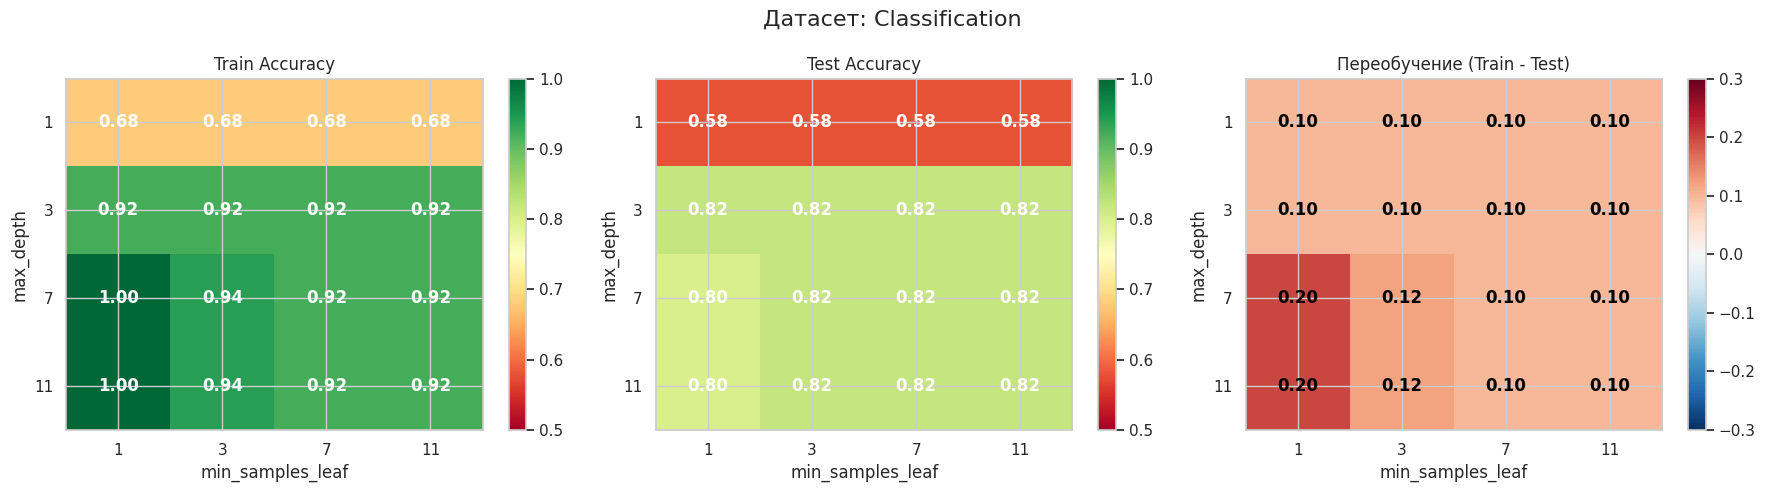

In [9]:
for name, (X, y) in datasets:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.5, stratify=y, random_state=43
    )

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'Датасет: {name}', fontsize=16)

    train_matrix = np.zeros((len(params['max_depth']), len(params['min_samples_leaf'])))
    test_matrix = np.zeros((len(params['max_depth']), len(params['min_samples_leaf'])))
    delta_matrix = np.zeros((len(params['max_depth']), len(params['min_samples_leaf'])))

    for i, max_depth in enumerate(params['max_depth']):
        for j, min_samples_leaf in enumerate(params['min_samples_leaf']):
            model = DecisionTreeClassifier(
                max_depth=max_depth,
                min_samples_leaf=min_samples_leaf,
                random_state=42
            )
            model.fit(X_train, y_train)

            acc_train = accuracy_score(y_train, model.predict(X_train))
            acc_test = accuracy_score(y_test, model.predict(X_test))

            train_matrix[i, j] = acc_train
            test_matrix[i, j] = acc_test
            delta_matrix[i, j] = acc_train - acc_test

    im1 = ax1.imshow(train_matrix, cmap='RdYlGn', aspect='auto', vmin=0.5, vmax=1.0)
    ax1.set_title('Train Accuracy')
    ax1.set_xlabel('min_samples_leaf')
    ax1.set_ylabel('max_depth')
    ax1.set_xticks(range(len(params['min_samples_leaf'])))
    ax1.set_yticks(range(len(params['max_depth'])))
    ax1.set_xticklabels(params['min_samples_leaf'])
    ax1.set_yticklabels(params['max_depth'])
    plt.colorbar(im1, ax=ax1)

    im2 = ax2.imshow(test_matrix, cmap='RdYlGn', aspect='auto', vmin=0.5, vmax=1.0)
    ax2.set_title('Test Accuracy')
    ax2.set_xlabel('min_samples_leaf')
    ax2.set_ylabel('max_depth')
    ax2.set_xticks(range(len(params['min_samples_leaf'])))
    ax2.set_yticks(range(len(params['max_depth'])))
    ax2.set_xticklabels(params['min_samples_leaf'])
    ax2.set_yticklabels(params['max_depth'])
    plt.colorbar(im2, ax=ax2)

    im3 = ax3.imshow(delta_matrix, cmap='RdBu_r', aspect='auto', vmin=-0.3, vmax=0.3)
    ax3.set_title('Переобучение (Train - Test)')
    ax3.set_xlabel('min_samples_leaf')
    ax3.set_ylabel('max_depth')
    ax3.set_xticks(range(len(params['min_samples_leaf'])))
    ax3.set_yticks(range(len(params['max_depth'])))
    ax3.set_xticklabels(params['min_samples_leaf'])
    ax3.set_yticklabels(params['max_depth'])
    plt.colorbar(im3, ax=ax3)

    for ax, matrix in zip([ax1, ax2, ax3], [train_matrix, test_matrix, delta_matrix]):
        for i in range(len(params['max_depth'])):
            for j in range(len(params['min_samples_leaf'])):
                ax.text(j, i, f'{matrix[i, j]:.2f}',
                       ha='center', va='center',
                       color='white' if abs(matrix[i, j]) > 0.5 else 'black',
                       fontweight='bold')

    plt.tight_layout()
    plt.show()

__Ответ:__

Ограничение глубины дерева оказалось критически важным. При глубине более 3 модель начинает переобучаться: она идеально запоминает обучающую выборку, но хуже работает на новых данных.
Увеличение числа листьев свыше 5 также не дает прироста качества — скорее всего, алгоритм исчерпывает полезные закономерности и начинает подстраиваться под шум. Исключением стал датасет «Moon», где качество просело на глубине 3 из-за особенностей данных, а вот для «Classification» почти любые настройки (кроме самых минимальных) дали отличный результат.
В итоге, более глубокие и ветвистые деревья далеко не всегда работают лучше.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw2code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу students.csv (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

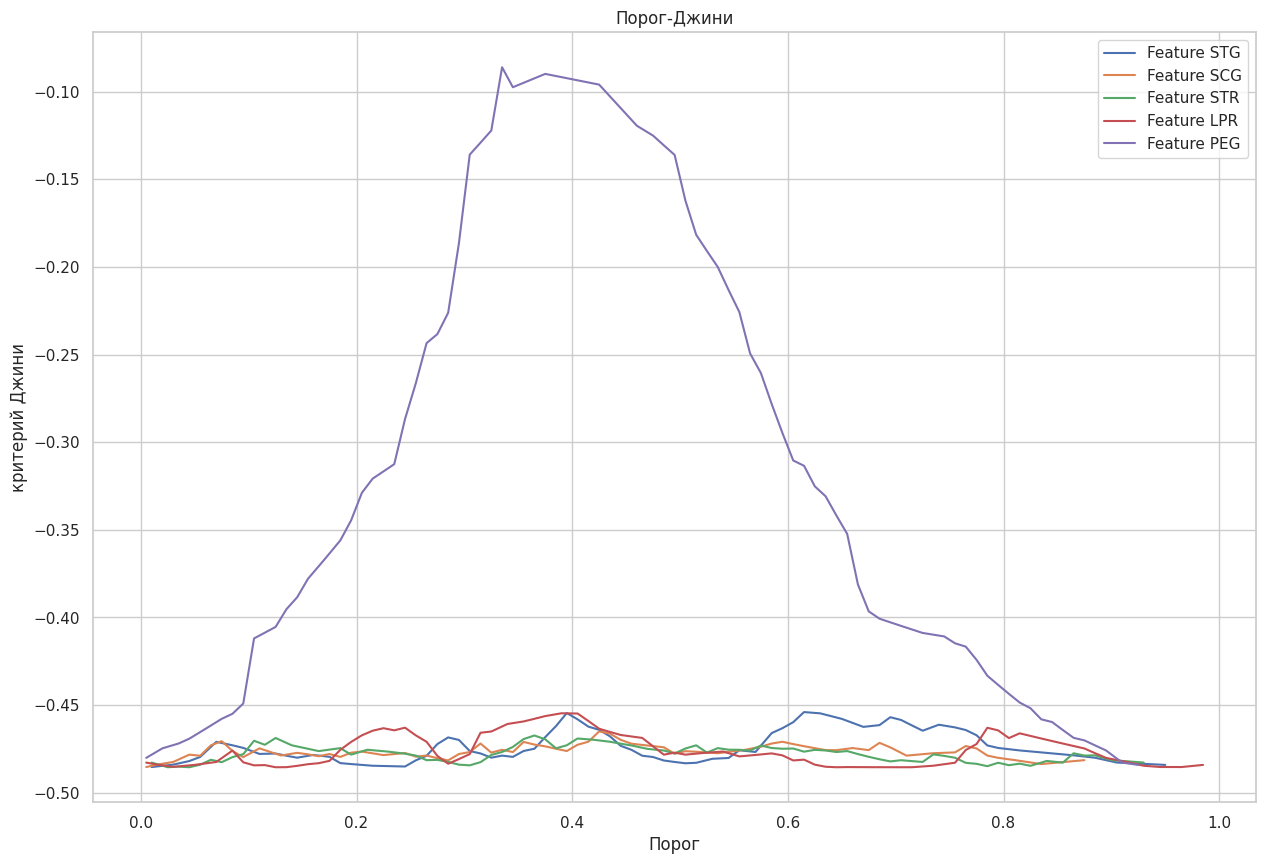

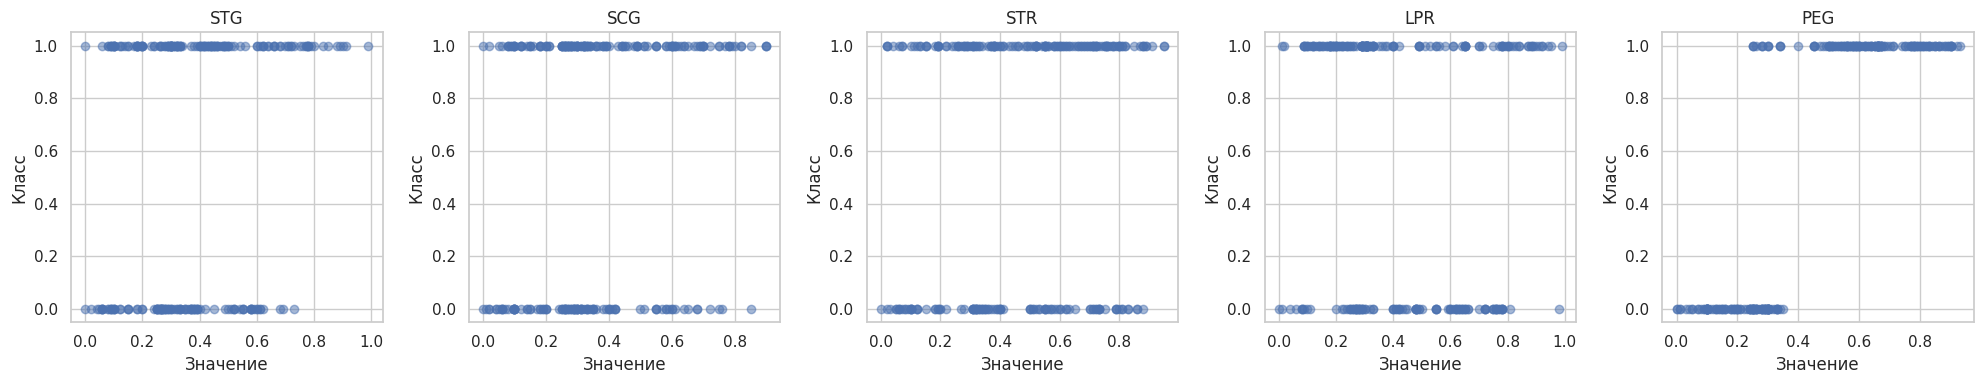

In [10]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from hw2code import find_best_split

df = pd.read_csv("students.csv")
df.head()
df.describe()

X = df.iloc[:, :-1]
y = df.iloc[:, -1].values

plt.figure(figsize=(15, 10))

for i, column in enumerate(X.columns):
    thresholds, ginis, _, _ = find_best_split(X[column].values, y)
    plt.plot(thresholds, ginis, label=f'Feature {column}')

plt.title("Порог-Джини")
plt.xlabel("Порог")
plt.ylabel("критерий Джини")
plt.legend()
plt.grid(True)
plt.show()

fig, axs = plt.subplots(1, 5, figsize=(20, 4))
for i, column in enumerate(X.columns):
    axs[i].scatter(X[column], y, alpha=0.5)
    axs[i].set_title(f'{column}')
    axs[i].set_xlabel("Значение")
    axs[i].set_ylabel("Класс")

plt.tight_layout()
plt.show()


__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

Ответ:

Признак PEG демонстрирует наилучшую разделяющую способность. Это подтверждается визуально: на диаграммах рассеяния наблюдается четкая граница между классами в районе значения 0.4. График критерия Джини также достигает своего глобального максимума в этой точке. Стоит отметить характерную форму кривых информативности: для качественных признаков, таких как PEG, график напоминает колокол нормального распределения, тогда как у неинформативных признаков он представляет собой плоскую ломаную линию без выраженного пика.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw2code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [11]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from hw2code import DecisionTree

df = pd.read_csv("agaricus-lepiota.data", header=None)

encoders = {}
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

y = df.iloc[:, 0].values
X = df.iloc[:, 1:].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)

feature_types = ["categorical"] * X.shape[1]
tree = DecisionTree(feature_types)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy  mushrooms: {acc:.3f}")

def tree_depth(node):
    if node["type"] == "terminal":
        return 0
    left_depth  = tree_depth(node["left_child"])
    right_depth = tree_depth(node["right_child"])
    return 1 + max(left_depth, right_depth)

depth = tree_depth(tree._tree)
print(f"Depth: {depth}")


Accuracy  mushrooms: 1.000
Depth: 7


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

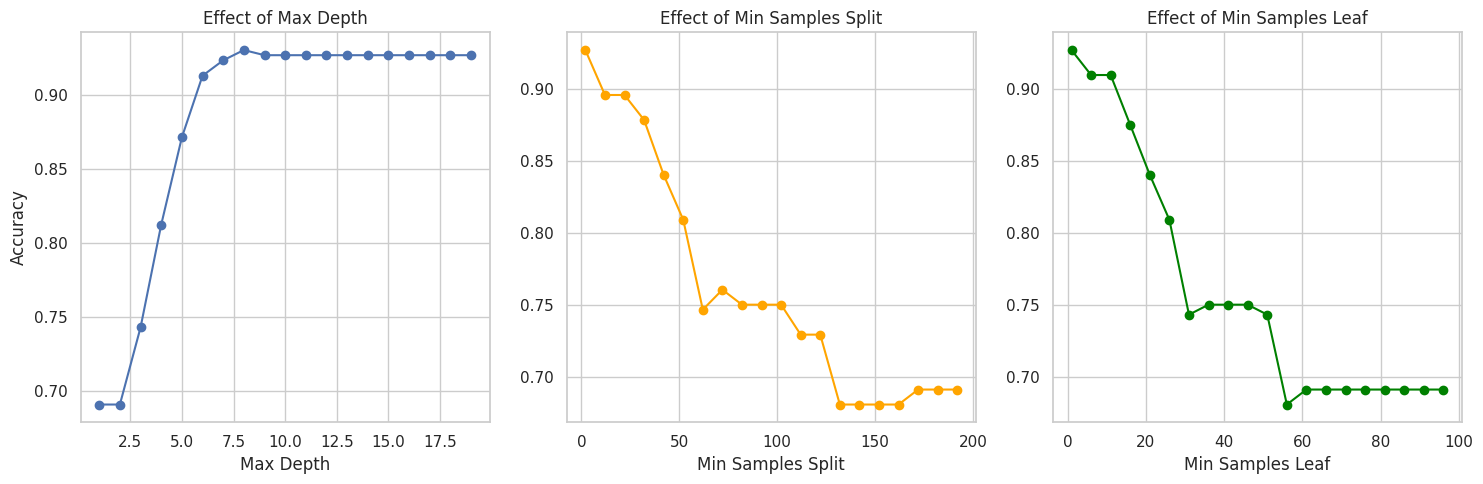

In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv("tic-tac-toe-endgame.csv")

encoders = {}
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

y = df.iloc[:, -1].values
X = df.iloc[:, :-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

feature_types = ["categorical"] * X.shape[1]

depths = range(1, 20)
acc_depth = []

for d in depths:
    tree = DecisionTree(feature_types, max_depth=d)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    acc_depth.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(depths, acc_depth, marker='o')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Effect of Max Depth")
plt.grid(True)


splits = range(2, 200, 10)
acc_split = []

for s in splits:
    tree = DecisionTree(feature_types, min_samples_split=s)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    acc_split.append(accuracy_score(y_test, y_pred))

plt.subplot(1, 3, 2)
plt.plot(splits, acc_split, marker='o', color='orange')
plt.xlabel("Min Samples Split")
plt.title("Effect of Min Samples Split")
plt.grid(True)


leaves = range(1, 100, 5)
acc_leaf = []

for l in leaves:
    tree = DecisionTree(feature_types, min_samples_leaf=l)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    acc_leaf.append(accuracy_score(y_test, y_pred))

plt.subplot(1, 3, 3)
plt.plot(leaves, acc_leaf, marker='o', color='green')
plt.xlabel("Min Samples Leaf")
plt.title("Effect of Min Samples Leaf")
plt.grid(True)

plt.tight_layout()
plt.show()

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import BaseEstimator, ClassifierMixin

from hw2code import DecisionTree

class DecisionTreeAdapter(BaseEstimator, ClassifierMixin):
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        self.feature_types = feature_types
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.model = None

    def fit(self, X, y):
        self.model = DecisionTree(
            feature_types=self.feature_types,
            max_depth=self.max_depth,
            min_samples_split=self.min_samples_split,
            min_samples_leaf=self.min_samples_leaf
        )
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)

data = {}

print("Загрузка данных...")


url_mush = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
df = pd.read_csv(url_mush, header=None)

for col in df.columns:
    df[col] = LabelEncoder().fit_transform(df[col])

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
data["mushrooms"] = (X, y)

url_ttt = "https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data"
df = pd.read_csv(url_ttt, header=None)
X = df.iloc[:, :-1].apply(LabelEncoder().fit_transform).values
y = LabelEncoder().fit_transform(df.iloc[:, -1].values)
data["tic-tac-toe"] = (X, y)

cols = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data", names=cols
)
df["class"] = df["class"].map(lambda v: 0 if v in ("unacc", "acc") else 1)
X = df.iloc[:, :-1].apply(LabelEncoder().fit_transform).values
y = df["class"].values
data["cars"] = (X, y)


cols = [
    "parents", "has_nurs", "form", "children", "housing", "finance", "social", "health", "class"
]
df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data",
    names=cols,
)
df["class"] = df["class"].map(lambda v: 0 if v in ("not_recom", "recommend") else 1)
X = df.iloc[:, :-1].apply(LabelEncoder().fit_transform).values
y = df["class"].values
data["nursery"] = (X, y)

scorer = make_scorer(accuracy_score)

def make_algorithms(X):
    n_feat = X.shape[1]
    try:
        ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        X_ohe = ohe.fit_transform(X)
    except TypeError:
        ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
        X_ohe = ohe.fit_transform(X)

    algos = {
        "real": DecisionTreeAdapter(["real"] * n_feat),
        "categorical": DecisionTreeAdapter(["categorical"] * n_feat),
        "real_OHE": DecisionTreeAdapter(["real"] * X_ohe.shape[1]),
        "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
    }

    return algos, X_ohe

res = []

for name, (X, y) in data.items():
    print(f"Обработка датасета: {name}")
    algos, X_ohe = make_algorithms(X)

    for alg_name, alg in algos.items():
        X_use = X_ohe if alg_name == "real_OHE" else X

        scores = cross_val_score(alg, X_use, y, cv=10, scoring=scorer)

        mean_score = scores.mean()
        print(f"  -> {alg_name}: {mean_score:.4f}")

        res.append(
            {
                "dataset": name,
                "algorithm": alg_name,
                "accuracy": mean_score,
            }
        )

df_res = pd.DataFrame(res)

table = df_res.pivot_table(
    index="dataset", columns="algorithm", values="accuracy"
).round(3)

print("\nИтоговая таблица:")
print(table)

Загрузка данных...
Обработка датасета: mushrooms
  -> real: 0.9993
  -> categorical: 1.0000
  -> real_OHE: 0.9996
  -> DecisionTreeClassifier: 0.9604
Обработка датасета: tic-tac-toe
  -> real: 0.4675
  -> categorical: 0.5425
  -> real_OHE: 0.5446
  -> DecisionTreeClassifier: 0.7717
Обработка датасета: cars
  -> real: 0.9426
  -> categorical: 0.9675
  -> real_OHE: 0.9195
  -> DecisionTreeClassifier: 0.9427
Обработка датасета: nursery
  -> real: 0.9997
  -> categorical: 0.9998
  -> real_OHE: 0.9995
  -> DecisionTreeClassifier: 0.9997

Итоговая таблица:
algorithm    DecisionTreeClassifier  categorical   real  real_OHE
dataset                                                          
cars                          0.943        0.968  0.943     0.919
mushrooms                     0.960        1.000  0.999     1.000
nursery                       1.000        1.000  1.000     1.000
tic-tac-toe                   0.772        0.542  0.468     0.545


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента.
Одинаково ли для разных наборов данных ранжируются алгоритмы?
Порассуждайте, почему так происходит.

Обратите внимание на значение признаков в разных наборах данных.
Присутствует ли в результатах какая-то компонента случайности?
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

Алгоритмы ранжируются не одинаково на разных наборах данных. Различия обусловлены природой признаков и тем, как разные методы кодирования взаимодействуют с решающим деревом.
В машинах признаки ординальные, поэтому отлично работает замена категории на вероятность, real_OHE сработал хуже тк дерево не понимает, что есть градация
В крестиках важны сложные взаимодествия признаков, а не значение признака самого по себе
Жадные деревья лучше работают с категориальными признаками, поэтому mushrooms/nursery отработали лучше всех
Не забываем про компоненту случайности, она присутсвует из-за кросс-валидации. Повлиять можно увелечением cv или фиксированием random_state

Вставьте что угодно, описывающее ваши впечатления от этого задания:

In [13]:
мяумяу мяумяу